<a href="https://colab.research.google.com/github/paolaportilloj/Visualizaci-n-de-datos-para-la-toma-de-decisiones/blob/main/SP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **¿Como piensan los alumnos del Tecnológico de Monterrey?**




Paola Portillo Jiménez A01620499

Se generó una encuesta a diversos estudiantes del Tec en donde cuentan con una carrera, edad y semestre diferente. Se recolectó información acerca de sus gustos e información personal. Se espera que por medio de la base de datos se puedan llegar a diferentes conclusiones en donde se puedan encontrar similitud entre los alumnos.

**Descripción de las variables**

**Categóricas**

1. Nombre completo: nombre del estudiante
2. Tec: Si son alumnos del Tecnológico de Monterrey
3. Semestre: en el semestre que estan actualmente
4. Carrera: cual carrera estan cursando
5. Género: si es hombre o mujer
6. Comida: describe la comida favorita del estudiante
7. Mejor superbowl en los últimos 5 años: cual consideran que ha sido el mejor show en el medio tiempo del Superbowl en los últimos 5 años.
8. Personaje favorito de Friends: Cual es su personaje favorito de la serie de Friends
9. Deporte: el deporte favorito 
10. Serie: su serie favorita 
11. Reggaetonero favorito:artista favorito del genero de reggaton
12. Personaje Favorito de Avengers: personaje favorito de Marvel
13. Cantante favorito mexicano: cantante favorito de México
14. Genero de música: su genero de música favorito
15. Equipo favorito mexicano de fútbol: equipo de fútbol mexicano favorito
16. Tienes novi@: si en este momento tienen novio o novia
17. Foráneo: si es foráneo o es de Monterrey
18. Pariente Favorito: con cual de sus parientes tiene una mayor conexión
19. Color Favorito: el color favorito de cada persona
20. Religión: el tipo de religión 
21. Quién es mejor: si el jugador Messi es mejor jugador que Cristiano


**Numéricas**
1. Edad: cuantos años tienen
2. Cuántos hermanos tienes: los hermanos con los que cuentan
3. Cuántos idiomas sabes hablar: los idiomas que saben hablar, contando con el nativo
4. Cuántas mascotas tienes: las mascotas que tienen, incluyendo en la casa de sus padres (si es que son foráneos)
5. Peso: el peso de las personas en kg






In [ ]:
path='/content/drive/MyDrive/5to semestre/1er periodo/Visualización de datos para la toma de decisiones/Base de datos de estudiantes TEC.xlsx'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_excel(path)

In [ ]:
cols=df.columns

In [ ]:
df.shape

(29, 32)

In [ ]:
cols=cols.to_list()

In [ ]:
df.index = df.index + 1

### **1. ¿Cuántos hombres y mujeres hay en la base de datos?** (pivot)

In [ ]:
countsDF = pd.pivot_table(data=df,
               index='Genero',
               values='Quién es mejor',
               aggfunc='count',
               )


In [ ]:
countsDF=countsDF.rename({'Quién es mejor':'Hombres VS. Mujeres'},
                     axis=1)
countsDF

,Hombres VS. Mujeres
Genero,
Hombre,17
Mujer,12


Como se puede observar el total de personas entrevistadas es de 29 personas en donde hay 17 hombres y 12 mujeres.

### **2. ¿Como se relaciona el peso con la altura?**

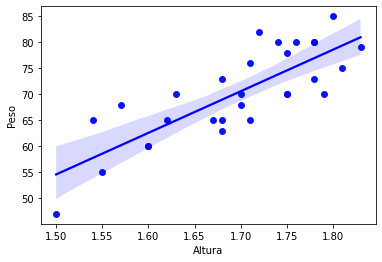

In [ ]:
sns.scatterplot(data=df, x='Altura', y='Peso')
sns.regplot(data=df, x='Altura', y='Peso', color='b')
plt.show()

Como se puede observar en la gráfica superior la mayoria de las personas cuentan con un peso lineal que crece como tal, existen alguna escepciones pero los datos se apegan a la linea de tendencia.

### **3. ¿Cuál es la moda en la religión?**

In [ ]:
religion=pd.pivot_table(data=df,
               index='Religión',
               values='Quién es mejor',
               aggfunc='count',
               )

In [ ]:
religion=religion.rename({'Quién es mejor':'Nùmero de personas'},
                     axis=1)
religion

,Nùmero de personas
Religión,
Agnóstico,2
Ateo,9
Católica,16
Cristiana,1
Evangelica,1


In [ ]:
religiones = ['Agnóstico', 'Ateo', 'Católica', 'Cristiana', 'Evangelica']
personas = [2, 9, 16, 1, 1]
colores = ['green', 'blue', 'red', 'yellow', 'purple']

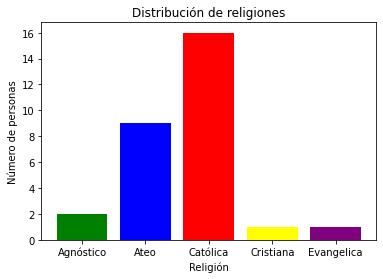

In [ ]:
plt.bar(religiones, personas, color=colores)
plt.xlabel('Religión')
plt.ylabel('Número de personas')
plt.title('Distribución de religiones')
plt.show()

Como se puede observar existen diferentes religiones las cuales son: agnóstico, ateo, católica, cristiana y evangélica. En donde la moda es de a religión catoltica con 16 personas, que es mas de la mitad de las personas evaluadas.

### **4. ¿Exiten hombres y mujeres que estudian lo mismo y tienen la misma edad?**


In [ ]:
c=pd.pivot_table(data=df,
                 index= ['Edad','Genero','Carrera '],
                 aggfunc='count',
                 values='Quién es mejor'
)
c=c.rename({'Quién es mejor':'Genero '},
                     axis=1)
c

Genero 
Edad Genero Carrera          
20   Hombre IDM             1
            IIS             2
            ITC             1
     Mujer  IID             1
            IIS             2
            IMT             1
21   Hombre IDM             1
            IE              3
            IIS             1
            ITD             1
            LAF             1
            led             1
     Mujer  ARQ             1
            IDM             2
            IIS             1
            LDI             1
            LEM             1
22   Hombre IBT             1
            IIS             2
            IMT             1
            LAF             1
     Mujer  IIS             1
            IQ              1

In [ ]:
c=c.reset_index()

In [ ]:
fig=px.sunburst(c,
                path=['Genero','Edad', 'Carrera '],
                values='Genero '
                )
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


Como se puede ver no existe una ran relacion entre el genero, carrera y edad ya que la mayorìa de las personas estudian una carrera diferente o tienen edad diferente. En el caso del la ingenerìa electronica, por sus siglas, IE, existen una relacion en que tres de ellos son hombres y tienen 21 años. 

### **5. ¿Cuál es el cantante favorito mexicano de los entrevistados?**

In [ ]:
counts = df['Cantante favorito mexicano '].value_counts()

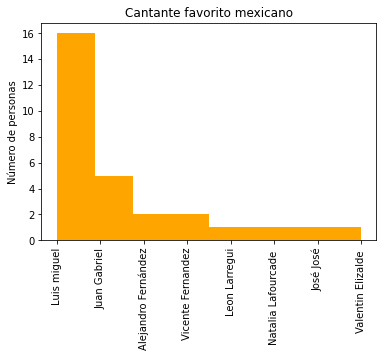

In [ ]:
plt.hist(counts.index, weights=counts.values, bins=len(counts), color='orange')
plt.title('Cantante favorito mexicano')
plt.ylabel('Número de personas')
plt.xticks(rotation=90)
plt.show()

### **6. ¿Existe alguna correlación entre el peso, altura y edad?**


In [ ]:
correlation = df['Peso'].corr(df['Altura'])
print(correlation)

0.8079331394488655


In [ ]:
correlation = df['Peso'].corr(df['Edad'])
print(correlation)

0.2311382867905357


In [ ]:
correlacion = df['Altura'].corr(df['Edad'])
print(correlation)

0.2311382867905357


In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

            Edad    Altura      Peso
Edad    1.000000  0.064219  0.231138
Altura  0.064219  1.000000  0.807933
Peso    0.231138  0.807933  1.000000


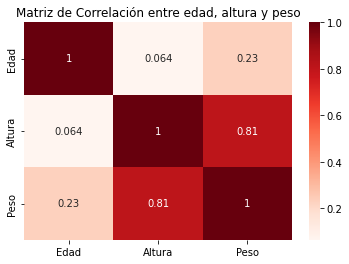

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Matriz de Correlación entre edad, altura y peso')
plt.show()




Como se puede observar en la tabla por tonalidades la edad no influye con el peso ni con la altura pero el peso y la altura si tienen una correlacion significante de 0.81


### **7. ¿Se puede calcular un peso que no este en la base de datos?**

In [ ]:
ndf=df[[ 'Altura', 'Peso', 'Genero'] ]
ndf=ndf.dropna()
ndf.isnull().any()

Altura    False
Peso      False
Genero    False
dtype: bool

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
X= ndf[[ 'Altura', 'Genero']]
y=ndf['Peso' ]

In [ ]:
modelA=sm.OLS.from_formula(' Peso~ Altura+Genero ',
                           data=ndf)
resultA=modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     26.26
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           5.76e-07
Time:                        17:59:20   Log-Likelihood:                -87.406
No. Observations:                  29   AIC:                             180.8
Df Residuals:                      26   BIC:                             184.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -43.3875     27.159     -1.598      0.122     -99.214      12.439
Genero[T.Mujer]    -3.0714      2.732     -1.124      0.271      -8.686       2.543
Altura             67.7530     15.534      4.362      0.000      35.822      99.684
==============================================================================
Omnibus:                        4.069   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                1.607
Skew:                           0.099   Prob(JB):                        0.448
Kurtosis:                       1.864   Cond. No.                         65.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

altura=float((input('Ingresa Altura')))

Ingresa Altura1.55


In [ ]:
genero=int(input('Ingresa (1 hombre, 0 mujer)'))

Ingresa (1 hombre, 0 mujer)0


In [ ]:
print('Peso de una mujer con altura de', altura, 'es',
      altura*67.7530+1*-3.0714-43.3875)

Peso de una mujer con altura de 1.55 es 58.55825


Como se puede observar si se aproxima al resultado, mas no es exacto ya que solo se cuenta con dos variables para hacer la regresion, si se agrega el tipo de alimentacion que tienen o si hacen ejercicio seria mas exacto. Se cuenta que contiene un r cuadrada se 0.669 lo cual es buena ya que se aproxima al 1. 

### **8. ¿El peso aumenta si aumenta la altura?**

In [43]:

df = df[['Altura', 'Peso']]
df = df.sort_values('Altura')



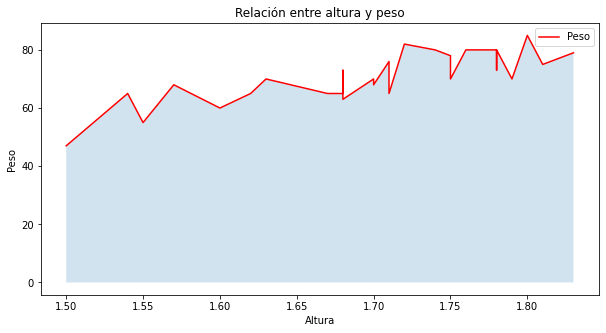

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(df['Altura'], df['Peso'], color='red', label='Peso')
plt.fill_between(df['Altura'], df['Peso'], alpha=0.2)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Relación entre altura y peso')
plt.legend()
plt.show()

Como se puede observar el peso si aumenta con respecto a la altura. Se puede decir que no aumenta de manera lineal ya que depende mucho de su dieta, ejercicio, edad y genero. El mayor peso no es la mayor altura pero aún así se puede ver que crece. 